In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _distance_matrix(p, r):
    p_mat = np.array([p] * r.shape[0]).transpose(2, 0, 1)
    r_mat = np.array([r] * p.shape[0]).transpose(2, 1, 0)
    
    return np.linalg.norm(p_mat - r_mat, axis=0)

In [215]:
def _parameter_matrix(dist_matrix):
    return _hyperbolic_norm(dist_matrix)

In [179]:
def _ratio_difference(dist_matrix):
    dist_matrix_column_sum = np.array([np.sum(dist_matrix, axis=1)] * dist_matrix.shape[1]).transpose()
    dist_matrix_column_sum = np.where(dist_matrix_column_sum == 0, 1, dist_matrix_column_sum)
    
    return 1 - dist_matrix / dist_matrix_column_sum    

In [192]:
def _hyperbolic(dist_matrix):
    return 1 / (dist_matrix**2 + 1)

In [205]:
def _hyperbolic_norm(dist_matrix):
    return np.min(dist_matrix**2) / (dist_matrix**2 + 1)

In [173]:
def _resultant_matrix(t, q):
    return np.matmul(t, q)

In [146]:
def attractor_mapping(p, q, r):
    return _resultant_matrix(_parameter_matrix(_distance_matrix(p, r)), q)

In [5]:
p = np.array([[0, 0], [1, 1]])
r = np.array([[1, 1], [2, 4], [-3, 2]])

d = _distance_matrix(p, r)
d

array([[1.41421356, 0.        ],
       [4.47213595, 3.16227766],
       [3.60555128, 4.12310563]])

In [6]:
t = _parameter_matrix(_distance_matrix(p, r))

In [7]:
q = np.array([[2, 1], [-1, -1]])

In [8]:
s = np.matmul(t, q)

(-2.0, 5.0)

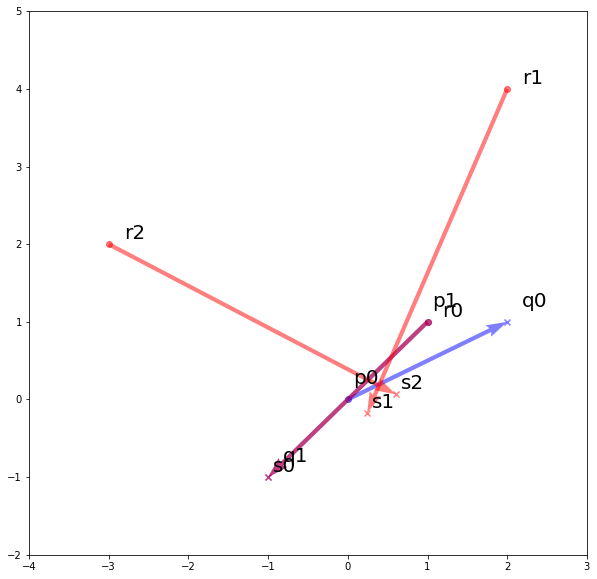

In [65]:
plt.figure(figsize=(10, 10))

plt.scatter(*[p_ for p_ in zip(*p)], c='blue', marker='o', alpha=0.5)
plt.scatter(*[p_ for p_ in zip(*r)], c='red', marker='o', alpha=0.5)
plt.scatter(*[p_ for p_ in zip(*q)], c='blue', marker='x', alpha=0.5)
plt.scatter(*[p_ for p_ in zip(*s)], c='red', marker='x', alpha=0.5)

plt.quiver(p[:, 0], p[:, 1], q[:, 0] - p[:, 0], q[:, 1] - p[:, 1], color='blue',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)
plt.quiver(r[:, 0], r[:, 1], s[:, 0] - r[:, 0], s[:, 1] - r[:, 1], color='red',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)

# for r_ in r:
#     for p_ in p:
#         if (r_ != p_).all():
#             plt.quiver(r_[0], r_[1], p_[0] - r_[0], p_[1] - r_[1], color='black',
#                        angles='xy', scale_units='xy', scale=1, alpha=0.2)

# for i, r_ in enumerate(r):
#     for j, q_ in enumerate(q):
#         if (r_ != q_).all():
#             plt.quiver(r_[0], r_[1], t[i, j] * (q_[0] - r_[0]), t[i, j] * (q_[1] - r_[1]), color='black',
#                        angles='xy', scale_units='xy', scale=1, alpha=0.2)            
            
            
for i, p_ in enumerate(p):
    plt.annotate('p' + str(i), p_, xytext=(5, 15), textcoords='offset points', fontsize=20)
    
for i, q_ in enumerate(q):
    plt.annotate('q' + str(i), q_, xytext=(15, 15), textcoords='offset points', fontsize=20)
    
for i, r_ in enumerate(r):
    plt.annotate('r' + str(i), r_, xytext=(15, 5), textcoords='offset points', fontsize=20)
    
for i, s_ in enumerate(s):
    plt.annotate('s' + str(i), s_, xytext=(5, 5), textcoords='offset points', fontsize=20)
        
plt.xlim(-4, 3)
plt.ylim(-2, 5)

In [78]:
r = np.array([[i, j] for i in range(5) for j in range(5)])
p = np.array([[0.5, 1.8]])
q = np.array([[2.5, 1.2]])

In [79]:
s = _resultant_matrix(_distance_matrix(p, r_grid), q)
s.shape

(25, 2)

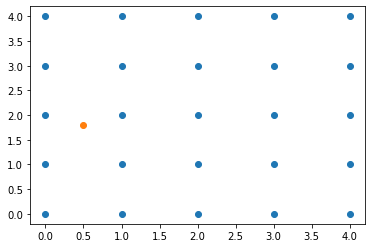

In [80]:
plt.scatter(*r_grid.transpose())
plt.scatter(*p.transpose())

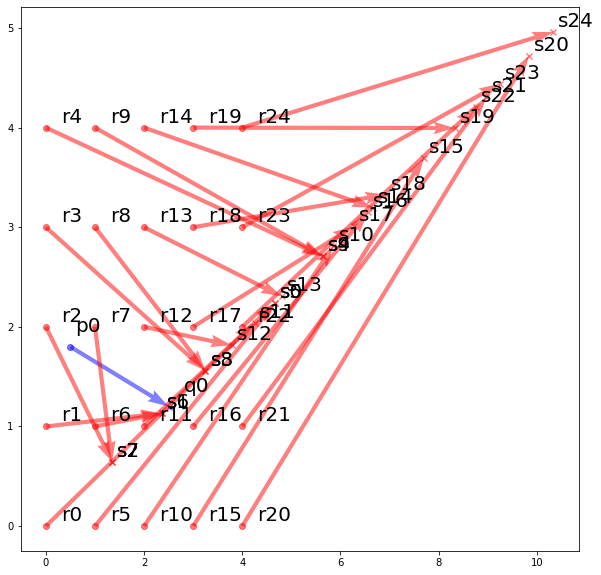

In [89]:
plt.figure(figsize=(10, 10))

plt.scatter(*[p_ for p_ in zip(*p)], c='blue', marker='o', alpha=0.5)
plt.scatter(*[p_ for p_ in zip(*r)], c='red', marker='o', alpha=0.5)
plt.scatter(*[p_ for p_ in zip(*q)], c='blue', marker='x', alpha=0.5)
plt.scatter(*[p_ for p_ in zip(*s)], c='red', marker='x', alpha=0.5)

plt.quiver(p[:, 0], p[:, 1], q[:, 0] - p[:, 0], q[:, 1] - p[:, 1], color='blue',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)
plt.quiver(r[:, 0], r[:, 1], s[:, 0] - r[:, 0], s[:, 1] - r[:, 1], color='red',
          angles='xy', scale_units='xy', scale=1, alpha=0.5)

# for r_ in r:
#     for p_ in p:
#         if (r_ != p_).all():
#             plt.quiver(r_[0], r_[1], p_[0] - r_[0], p_[1] - r_[1], color='black',
#                        angles='xy', scale_units='xy', scale=1, alpha=0.2)

# for i, r_ in enumerate(r):
#     for j, q_ in enumerate(q):
#         if (r_ != q_).all():
#             plt.quiver(r_[0], r_[1], t[i, j] * (q_[0] - r_[0]), t[i, j] * (q_[1] - r_[1]), color='black',
#                        angles='xy', scale_units='xy', scale=1, alpha=0.2)            
            
            
for i, p_ in enumerate(p):
    plt.annotate('p' + str(i), p_, xytext=(5, 15), textcoords='offset points', fontsize=20)
    
for i, q_ in enumerate(q):
    plt.annotate('q' + str(i), q_, xytext=(15, 15), textcoords='offset points', fontsize=20)
    
for i, r_ in enumerate(r):
    plt.annotate('r' + str(i), r_, xytext=(15, 5), textcoords='offset points', fontsize=20)
    
for i, s_ in enumerate(s):
    plt.annotate('s' + str(i), s_, xytext=(5, 5), textcoords='offset points', fontsize=20)
        
# plt.xlim(-4, 3)
# plt.ylim(-2, 5)

In [132]:
r = np.array([[i, j] for i in range(5) for j in range(5)])
p = np.array([[0.5, 1.8], [1.2, 3.1], [3.3, 3.3]])
q = np.array([[2.5, 1.2], [3, 3.3], [1.5, 2]])

l = _distance_matrix(p, r)
t = _parameter_matrix(l)
s = _resultant_matrix(t, q)

s_norm = s * np.max(r, axis=0) / np.max(s, axis=0)

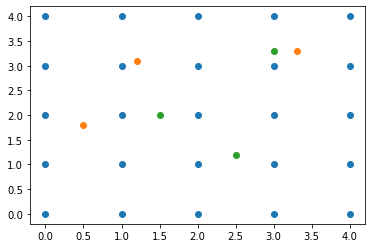

In [133]:
plt.scatter(*r.transpose())
plt.scatter(*p.transpose())
plt.scatter(*q.transpose())

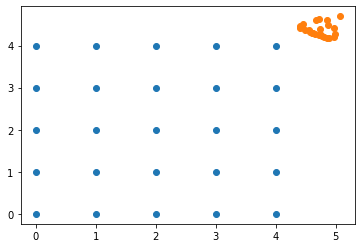

In [134]:
plt.scatter(*r.transpose())
plt.scatter(*s.transpose())

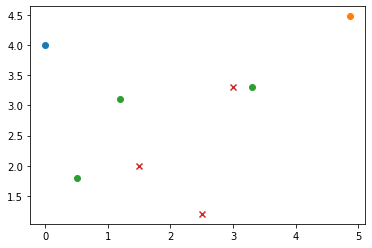

In [135]:
plt.scatter(*r[4, :])
plt.scatter(*s[4, :])
plt.scatter(*p.transpose())
plt.scatter(*q.transpose(), marker='x')

In [219]:
r = np.array([[i, j] for i in range(5) for j in range(5)])
p = np.array([[0.5, 1.8]])
q = np.array([[2.5, 1.2]])

In [220]:
border = np.array([[x, 0] for x in range(5)] 
                    + [[x, 4] for x in range(5)] 
                    + [[0, y] for y in range(1, 4)] 
                    + [[4, y] for y in range(1, 4)])
p = np.concatenate((p, border))
q = np.concatenate((q, border))

In [227]:
l = _distance_matrix(p, r)
t = _parameter_matrix(l)
s = _resultant_matrix(t, q)

s_norm = s * np.max(r, axis=0) / np.max(s, axis=0)

<ipython-input-227-7f520c5d4b5b>:5: RuntimeWarning: invalid value encountered in true_divide
  s_norm = s * np.max(r, axis=0) / np.max(s, axis=0)


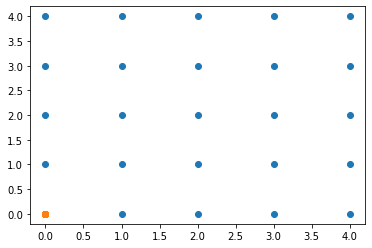

In [223]:
plt.scatter(*r.transpose())
plt.scatter(*(s.transpose()))

In [228]:
l

array([[1.86815417, 0.        , 1.        , 2.        , 3.        ,
        4.        , 4.        , 4.12310563, 4.47213595, 5.        ,
        5.65685425, 1.        , 2.        , 3.        , 4.12310563,
        4.47213595, 5.        ],
       [0.94339811, 1.        , 1.41421356, 2.23606798, 3.16227766,
        4.12310563, 3.        , 3.16227766, 3.60555128, 4.24264069,
        5.        , 0.        , 1.        , 2.        , 4.        ,
        4.12310563, 4.47213595],
       [0.53851648, 2.        , 2.23606798, 2.82842712, 3.60555128,
        4.47213595, 2.        , 2.23606798, 2.82842712, 3.60555128,
        4.47213595, 1.        , 0.        , 1.        , 4.12310563,
        4.        , 4.12310563],
       [1.3       , 3.        , 3.16227766, 3.60555128, 4.24264069,
        5.        , 1.        , 1.41421356, 2.23606798, 3.16227766,
        4.12310563, 2.        , 1.        , 0.        , 4.47213595,
        4.12310563, 4.        ],
       [2.25610283, 4.        , 4.12310563, 4.472135

In [226]:
_hyperbolic_norm(l)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0